# Exercise 7

# Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [3]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [4]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [6]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [7]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [8]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()



hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

According to the data, the times of the day on which the bike is most used are 17h, 18h and 8h.


# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

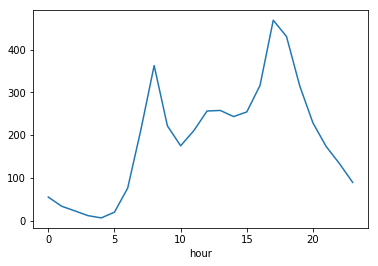

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

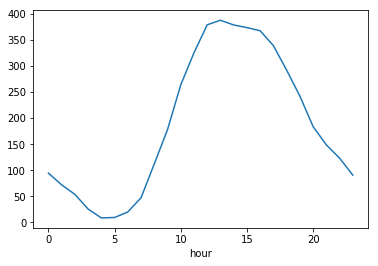

In [17]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

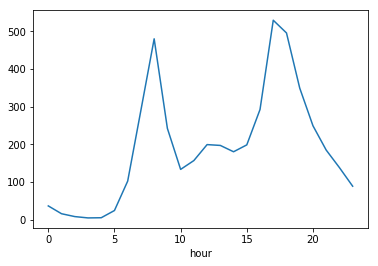

In [18]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

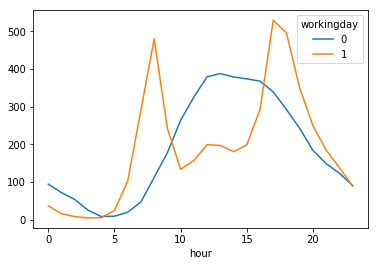

In [19]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

During working day, the distribution of the use of the bike is different than on weekends. On the latter, bike is used as a recreative activity rather than a commute mean of transportation. Also, it can be seen on the graphic the 2 rush hours that compose the commute flows, from home to office and viceversa. 

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [20]:
from sklearn.model_selection import train_test_split  
from sklearn import metrics

X=bikes[['hour','workingday']]
y=bikes['total']
#Train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

list(zip(lr.coef_, X.columns))

RMSE: 161.368569125095


[(10.592589013754571, 'hour'), (2.7163638573466793, 'workingday')]

In [14]:
print('Lo anterior quiere decir que por cada unidad de hour y workingday, el total aumenta en 15.7. ')

Lo anterior quiere decir que por cada unidad de hour y workingday, el total aumenta en 15.7. 


# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [15]:
def hour_(train, hour):
    train['pred'] = train.loc[train.hour<hour, 'total'].mean()
    train.loc[train.hour>=hour, 'pred'] = train.loc[train.hour>=hour, 'total'].mean()
    print ((((train['total'] - train['pred'])**2).mean()) ** 0.5)

def workingday_(train, workingday):
    train['pred'] = train.loc[train.workingday<workingday, 'total'].mean()
    train.loc[train.workingday>=workingday, 'pred'] = train.loc[train.workingday>=workingday, 'total'].mean()
    print ((((train['total'] - train['pred'])**2).mean()) ** 0.5)

In [22]:
for hour in bikes.hour.unique():
    print('hour ',hour)
    hour_(bikes, hour)
print('----------------------------------')  
for workingday in bikes.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes, workingday)      

hour  0
181.13613357426559
hour  1
178.88076030483188
hour  2
175.61266024769844
hour  3
171.5350162975495
hour  4
166.57596568309665
hour  5
160.50832916137819
hour  6
154.10979930228774
hour  7
150.22560060405686
hour  8
153.86972728404965
hour  9
163.39221989024873
hour  10
165.25615391972227
hour  11
165.00286510437286
hour  12
165.84659205524616
hour  13
168.04756019190663
hour  14
169.94604099621912
hour  15
171.14521362143498
hour  16
172.47403631919644
hour  17
175.2235068708682
hour  18
179.8668827954335
hour  19
181.12705316323988
hour  20
180.44126246625746
hour  21
179.7297936918192
hour  22
179.51222338944388
hour  23
179.87454650980683
----------------------------------
workingday 0
181.13613357426559
workingday 1
181.12395921110544


In [23]:
bikes_l = bikes.loc[bikes.hour<7].copy()
bikes_r = bikes.loc[bikes.hour>=7].copy()

In [24]:
# Left node
bikes_eval=bikes_l
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    hour_(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes_eval, workingday)    

hour  0
39.56714516247788
hour  1
38.46175887834954
hour  2
38.827302356307555
hour  3
39.34538405588436
hour  4
39.534113157382144
hour  5
38.30948200125475
hour  6
35.24426946227024
----------------------------------
workingday 0
39.56714516247788
workingday 1
39.18093811435608


In [25]:
bikes_l_l = bikes_l.loc[bikes_l.hour<6].copy()
bikes_l_r = bikes_l.loc[bikes_l.hour>=6].copy()
bikes_l_l.shape,bikes_l_r.shape

((2684, 13), (455, 13))

In [26]:
# Left node depth 1
bikes_eval=bikes_l_l
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    hour_(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes_eval, workingday)    

hour  0
30.753540668567577
hour  1
27.614237275202125
hour  2
27.46590337533093
hour  3
28.171307299972213
hour  4
29.557984864071205
hour  5
30.657024737799514
----------------------------------
workingday 0
30.753540668567577
workingday 1
27.86868086542797


In [27]:
bikes_l_l_l = bikes_l_l.loc[bikes_l_l.hour<2].copy()
bikes_l_l_r = bikes_l_l.loc[bikes_l_l.hour>=2].copy()

In [28]:
# Left node depth 2
bikes_eval=bikes_l_l_l
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    hour_(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes_eval, workingday)   

hour  0
40.538959119681785
hour  1
39.117819478677326
----------------------------------
workingday 0
40.538959119681785
workingday 1
30.694005806108365


In [29]:
bikes_l_l_l_l = bikes_l_l_l.loc[bikes_l_l_l.workingday==0].copy()
bikes_l_l_l_r = bikes_l_l_l.loc[bikes_l_l_l.workingday==1].copy()

In [30]:
# Left node depth 1-Right 
bikes_eval=bikes_l_l_l_l
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    hour_(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes_eval, workingday)   

hour  0
42.685635151369894
hour  1
41.16560620668486
----------------------------------
workingday 0
42.685635151369894


In [31]:
# Left nodedepth 2-Right
bikes_eval=bikes_l_l_l_r
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    hour_(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes_eval, workingday)   

hour  0
23.018939000078593
hour  1
20.55355800490316
----------------------------------
workingday 1
23.018939000078593


In [32]:
# Nodo Izq-Izq Der
bikes_eval=bikes_l_l_r
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    hour_(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes_eval, workingday)   
    

hour  2
17.29426553034504
hour  3
16.717555760255358
hour  4
17.162529778774573
hour  5
17.093928272746314
----------------------------------
workingday 0
17.29426553034504
workingday 1
16.13723627658292


In [33]:
bikes_l_l_r_l = bikes_l_l_r.loc[bikes_l_l_r.workingday==0].copy()
bikes_l_l_r_r = bikes_l_l_r.loc[bikes_l_l_r.workingday==1].copy()

In [34]:
# Left Node depth 2-Right
bikes_eval=bikes_l_l_r_l
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    hour_(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes_eval, workingday)   

hour  2
23.589552753575976
hour  3
16.377550739536485
hour  4
17.938809770108577
hour  5
21.98837760722226
----------------------------------
workingday 0
23.589552753575976


In [35]:
bikes_l_l_r_l_l = bikes_l_l_r_l.loc[bikes_l_l_r_l.hour<3].copy()
bikes_l_l_r_l_r = bikes_l_l_r_l.loc[bikes_l_l_r_l.hour>=3].copy()

In [36]:
bikes_eval=bikes_l_l_r_l_r
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    hour_(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes_eval, workingday)   

hour  3
12.169313609764815
hour  4
9.323801035579761
hour  5
11.627851511960445
----------------------------------
workingday 0
12.169313609764815


In [37]:
bikes_eval=bikes_l_l_r_r
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    hour_(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes_eval, workingday)   

hour  4
10.05537659422398
hour  5
7.417589653876195
hour  2
10.904795521560734
hour  3
10.803514040463659
----------------------------------
workingday 1
10.904795521560734


In [38]:
bikes_l_l_r_r_l = bikes_l_l_r_r.loc[bikes_l_l_r_r.hour<5].copy()
bikes_l_l_r_r_r = bikes_l_l_r_r.loc[bikes_l_l_r_r.hour>=5].copy()

In [39]:
bikes_eval=bikes_l_l_r_r_r
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    hour_(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes_eval, workingday)   

hour  5
11.825783573530835
----------------------------------
workingday 1
11.825783573530835


In [40]:
# Right node
bikes_eval=bikes_r
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    hour_(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes_eval, workingday)

hour  7
176.28835016242152
hour  8
175.9626543129351
hour  9
175.9026463917815
hour  10
176.22897287604295
hour  11
176.1454556323947
hour  12
175.84813796801208
hour  13
175.89260116453647
hour  14
175.92916682007098
hour  15
175.83965773793437
hour  16
175.82530141788737
hour  17
176.19523832330185
hour  18
175.115249088561
hour  19
170.74027110094912
hour  20
167.37168785994314
hour  21
166.69864069956597
hour  22
168.20616961120874
hour  23
171.30096203191567
----------------------------------
workingday 0
176.28835016242152
workingday 1
176.2245057824691


In [41]:
bikes_r_l = bikes_r.loc[bikes_r.hour<21].copy()
bikes_r_r = bikes_r.loc[bikes_r.hour>=21].copy()

In [42]:
bikes_eval=bikes_r_l
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    hour_(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes_eval, workingday)

hour  7
180.02864972098826
hour  8
178.99715046718114
hour  9
180.0152330686221
hour  10
179.8185136914361
hour  11
178.3022430628963
hour  12
176.75986364527014
hour  13
176.22253234052977
hour  14
175.53287560508187
hour  15
174.04175510396522
hour  16
172.4267605458089
hour  17
173.07581303410245
hour  18
178.6648712641945
hour  19
179.97602519154125
hour  20
179.4031992036802
----------------------------------
workingday 0
180.02864972098826
workingday 1
179.9813181571363


In [43]:
bikes_r_l_l = bikes_r_l.loc[bikes_r_l.hour<16].copy()
bikes_r_l_r = bikes_r_l.loc[bikes_r_l.hour>=16].copy()

In [44]:
bikes_eval=bikes_r_l_l
for hour in bikes_eval.hour.unique():
    print('hour ',hour)
    hour_(bikes_eval, hour)
print('----------------------------------')  
for workingday in bikes_eval.workingday.unique():
    print('workingday',workingday)
    workingday_(bikes_eval, workingday)

hour  7
156.72440257472772
hour  8
156.34522917916382
hour  9
154.95247130836913
hour  10
155.9558851652572
hour  11
156.72292931961604
hour  12
156.51433435445483
hour  13
156.62481542315632
hour  14
156.70229619927898
hour  15
156.68163321041817
----------------------------------
workingday 0
156.72440257472772
workingday 1
155.56614105625243


# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [50]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import tree
import pydotplus
#import graphviz
from IPython.display import Image

In [54]:
feature_cols = ['workingday','hour']
X = bikes[feature_cols]
y = bikes.total
treereg = DecisionTreeRegressor(max_depth=10, random_state=1)
scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')

np.mean(np.sqrt(-scores))

107.57576561312104

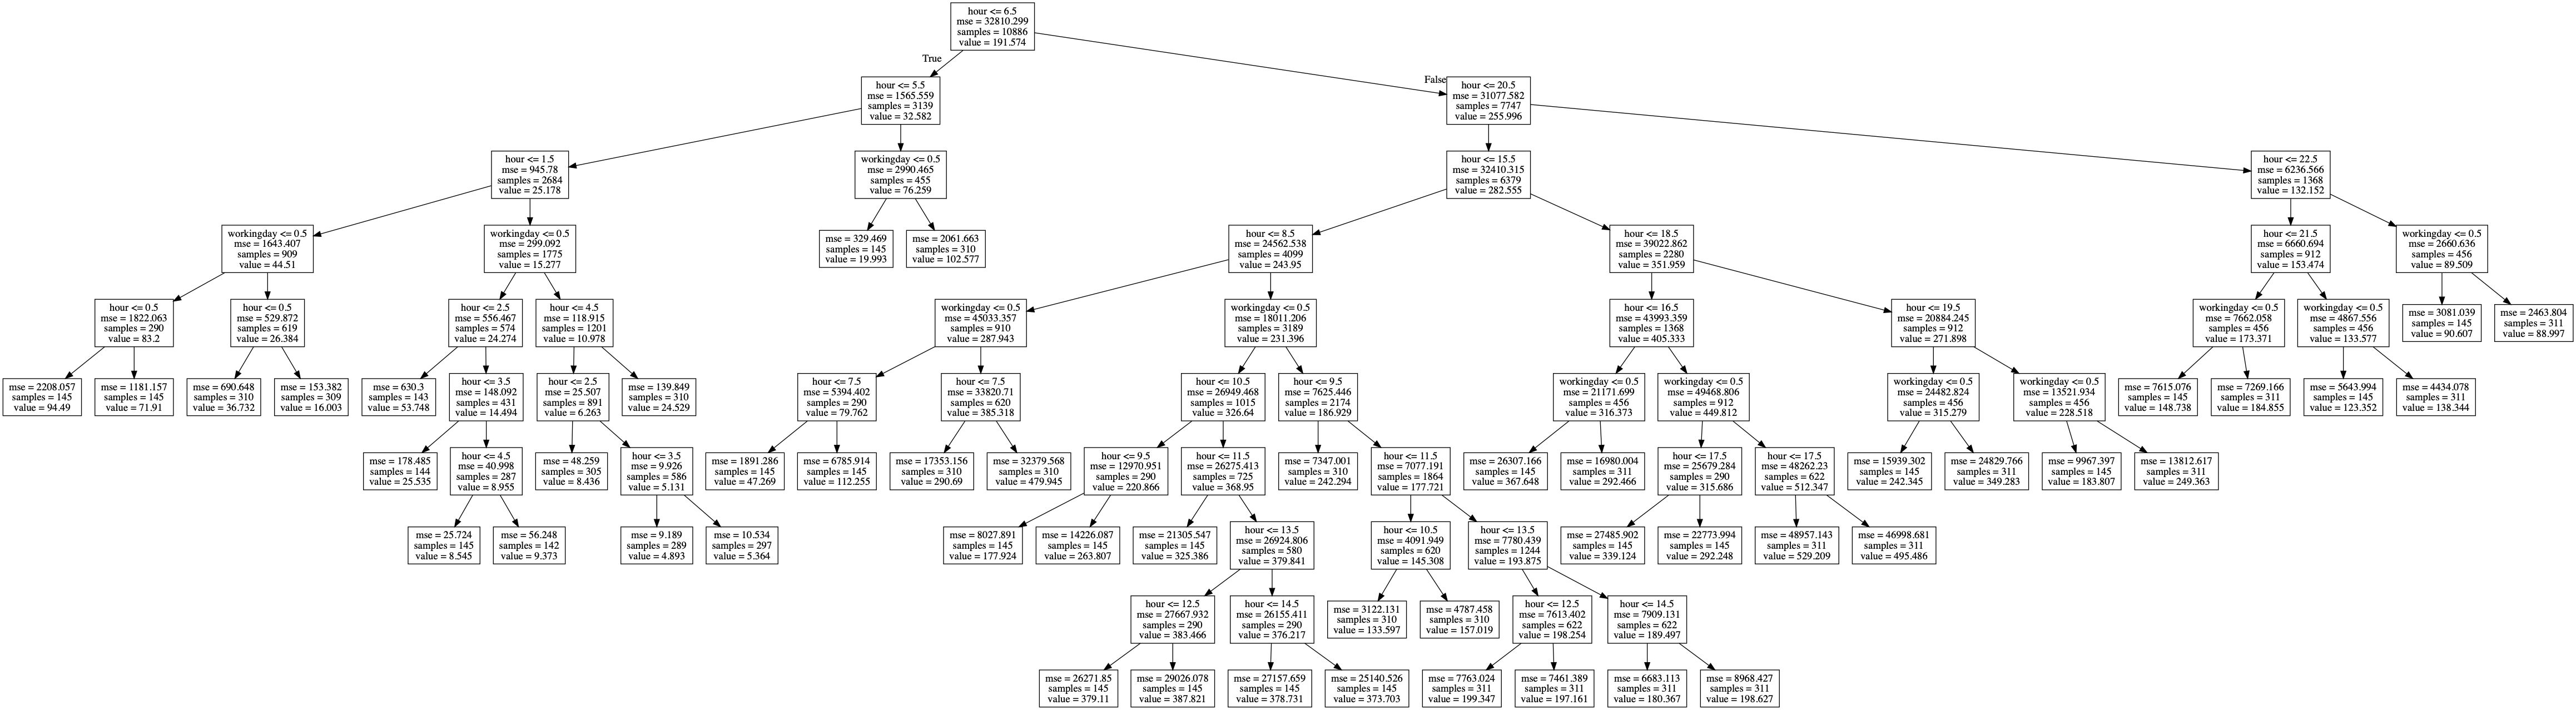

In [55]:
# create a Graphviz file
treereg = DecisionTreeRegressor(max_depth=15, random_state=1)
treereg.fit(X, y)
dot_data = tree.export_graphviz(treereg, out_file=None,feature_names =X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

The decision tree trained with sklearn has 10 steps. This same results with the alternative process would have taken much more time and computational power. The model score is 107.575
